# K-Means Algorithm from Scratch

### Unsupervised Learning with Clustering

#### Author: Markus Ullenbruch

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## 1. The Algorithm

In [2]:
class Kmeans:
    """ Implementation of K-Means Clustering Algorithm
    
    Inputs:
        n_clusters     -- Number of Clusters/Classes the algorithm classifies in the data
        eps            -- Breaking Condition for convergence
        max_iterations -- Maximum number of total training iterations
        
    """
    def __init__(self, n_clusters, eps=0.001, max_iterations=80):
        self.k = n_clusters
        self.eps = eps
        self.max_iter = max_iterations
        self.converge = False
        self.step = 0
        
    def fit(self, data):
        np.random.shuffle(data)
        
        # means sind die initialen Mittelpunkte
        self.means = {}
        for i in range(self.k):
            self.means[i] = data[i,:]
            
        for _ in range(self.max_iter):
            self.step += 1
            
            self.classifications = {}
            for j in range(self.k):
                self.classifications[j] = []
            
            # Calculate distances of every sample to all k means centroids and assign class index based on minimum distance
            # Append the sample into the dictionary with the class index as key
            for sample in data:
                distance = [np.linalg.norm(sample - values) for _, values in self.means.items()]
                class_idx = np.argmin(distance) # Class index of sample
                self.classifications[class_idx].append(sample)
            
            means_prev = self.means.copy()
            for k in range(self.k):
                features_per_class = np.vstack(self.classifications[k])
                self.means[k] = np.mean(features_per_class, axis=0, keepdims=True)
            
            # Break fitting process when means are converging
            diff = 0.0
            for key in self.means:
                diff += np.abs(np.mean(self.means[key] - means_prev[key]))
            if diff < self.eps:
                self.converge = True
                break
                
        self.info()
                
    
    def predict(self, data):
        pred = []
        for sample in data:
            distance = [np.linalg.norm(sample - values) for _, values in self.means.items()]
            class_idx = np.argmin(distance)
            pred.append(class_idx)
        return np.vstack(pred)
            
    
    def info(self):
        if self.converge:
            print("Algorithm converges with tolerance of eps: ", self.eps)
        else:
            print("Algorithm did not converge due to eps parameter")
        print("after ", self.step, "iteration steps.")
        centroids = np.vstack([value for _, value in self.means.items()])
        print("\nFound Centroids:")
        for idx, means in enumerate(centroids):
            print("Class", idx, ":", means)

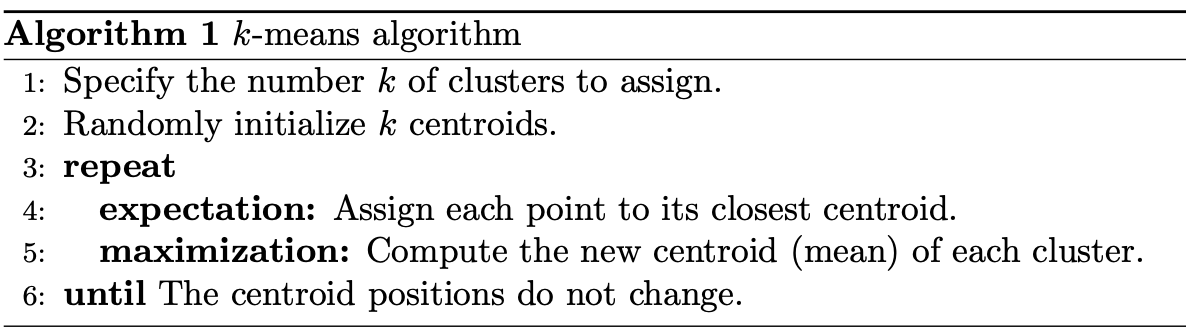

## 2. Test the Algorithm

### Make Data

In [3]:
def make_cluster(mu, sigma):
    x = np.random.normal(mu, sigma, size=100)
    y = np.random.normal(mu, sigma, size=100)
    return x, y

In [4]:
x1, y1 = make_cluster(4, 3)
x2, y2 = make_cluster(10, 3)
x3, y3 = make_cluster(18, 3)

In [5]:
x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))
X = np.array([x, y]).transpose()  # Make Dataset
print(X.shape)

(300, 2)


### Inference

In [6]:
clusters=3
k = Kmeans(n_clusters=clusters)
k.fit(X)
predictions = k.predict(X)

Algorithm converges with tolerance of eps:  0.001
after  7 iteration steps.

Found Centroids:
Class 0 : [9.570809   9.92676034]
Class 1 : [17.69892263 17.93883601]
Class 2 : [4.14998429 3.42796107]


### Result of Clustering

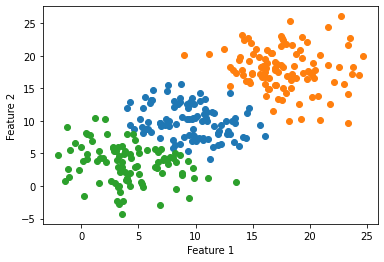

In [7]:
for k in range(clusters):
    idx = np.where(predictions==k)[0]
    data = X[idx,:]
    x, y = data[:,0], data[:,1]
    plt.scatter(x, y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Original Data

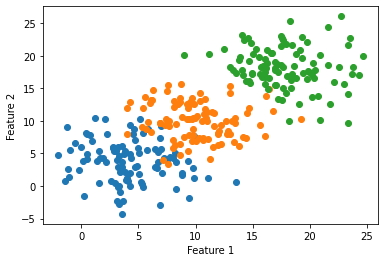

In [8]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()